GÖGÜS KANSERİ SINIFLANDIRMASI

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.drop(['Unnamed: 32','id'], inplace = True, axis = 1) 

In [4]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data = data.rename(columns = {"diagnosis":"target"}) #diagnosis isimli sutunun adını target olarak değiştirdim

In [7]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


B    357
M    212
Name: target, dtype: int64


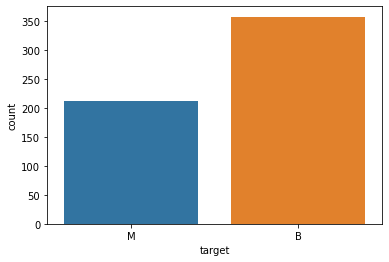

In [8]:
sns.countplot(data["target"])
print(data.target.value_counts()) #verilerimin kaç adet kanser olduğunu gösterdi

In [9]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target] #datamın target içerisindeki harf değerleri sayısallaştırdım

In [10]:
print(len(data)) #data sayısı (uzunluğu)

569


In [11]:
print("Data shape ", data.shape) #satır sütun sayısı

Data shape  (569, 31)


In [12]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


1 ve 5. sütunlarda gördüğümüz gibi çok büyük sayı farkı var bunu ayarlamamız gerekiyor. çünkü büyük sayılar küçük sayılara baskın gelebilir

KEŞİFSEL VERİ ANALİZİ (exploratory data analysis; EDA)

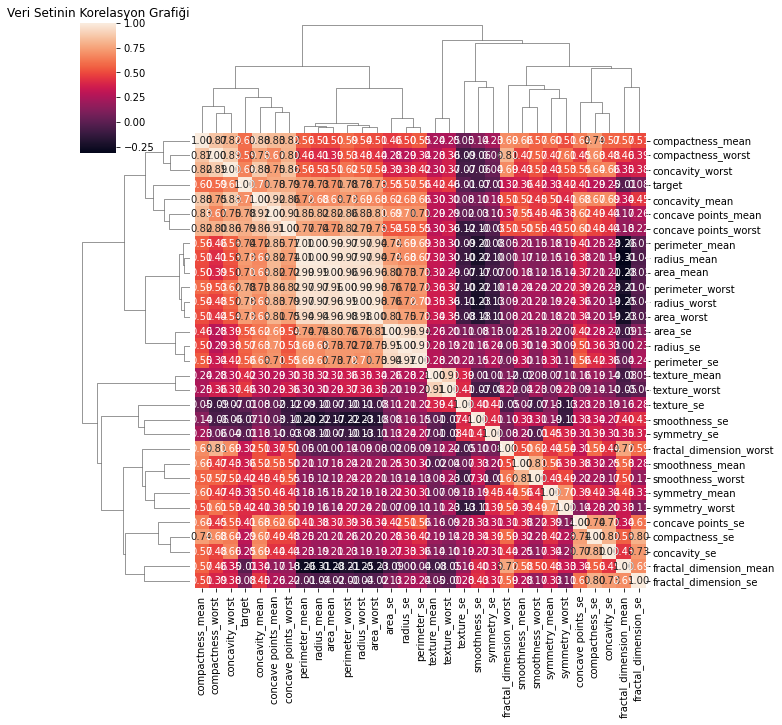

In [14]:
# Correlation #nümerik değerlere sahip bir setim olduğu için korelasyon uyguladım. #korelasyon haritası çalış
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Veri Setinin Korelasyon Grafiği")
plt.show()

Text(0.5, 1.0, 'Korelasyon Grafiği Threshold 0.75')

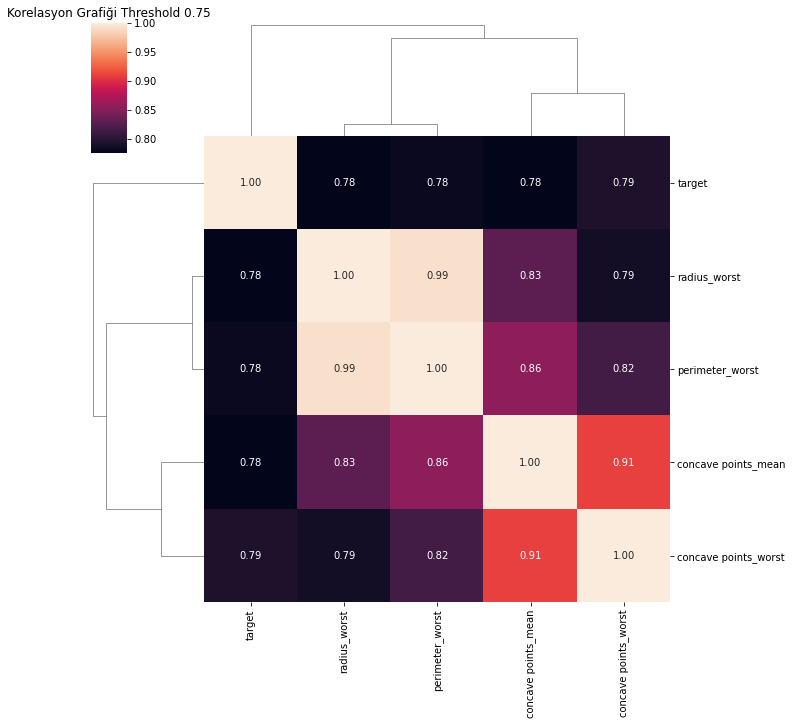

In [15]:
threshold = 0.75 #sadece 0.75 den yüksek değerleri göster demek
filtre = np.abs(corr_matrix["target"]) > threshold #targeti al threshold ile karşılaştır
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Korelasyon Grafiği Threshold 0.75")


In [16]:
# box plot 
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

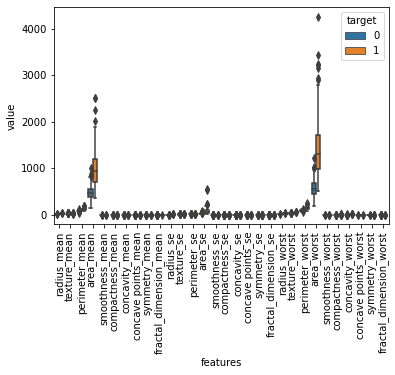

In [17]:
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

OUTLİER DETECTİON (LOCAL OUTLİER) #aykırı değer tespiti

local outlier algoritması belirli bir veri nokasının komşularına göre yerel yoğunluk sapması hesaplayan denetimsiz bir algoritmadır.

In [19]:
# Outlier (Aykırı Değer Tespiti)
y = data.target    #datamı x ve y olarak ayırdım
x = data.drop(["target"],axis = 1) #target sütununu çıkartıyorum sayısal değerler olmadığı için
columns = x.columns.tolist() #öz nitelikleri colums içine depoladık 


In [20]:
clf = LocalOutlierFactor() 
y_pred = clf.fit_predict(x) #denetimsiz bir algoritma old. için buradaki işlem test train işlemi değil.
X_score = clf.negative_outlier_factor_

In [21]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [43]:
outlier_score

,score,radius
0,-1.422440,0.217679
1,-1.066782,0.055159
2,-0.978948,0.015022
3,-1.596933,0.297414
4,-1.069936,0.056600
...,...,...
564,-1.330082,0.175475
565,-0.997906,0.023685
566,-0.997441,0.023473
567,-0.993730,0.021777


In [22]:
# threshold
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

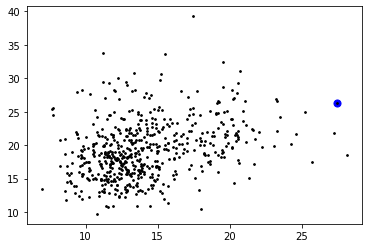

In [23]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points")

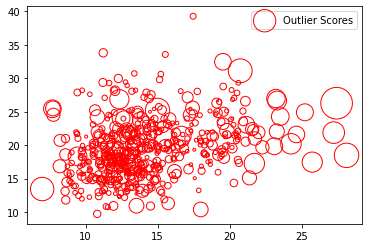

In [24]:
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [25]:
# drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [26]:
# Veris setini %70 eğitim ve %30 test verisi olarak ikiye böldüm
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


Standardizasyon

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train


In [29]:
# Standartizasyondan sonra elde ettiğim veriyi görselleştirdim
X_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,-0.126206,-0.106331,-0.139113,-0.243152,0.200584,0.082163,-0.426589,-0.287204,-0.345793,0.802295,...,0.026662,-0.235439,-0.316803,0.456859,0.060010,-0.359469,0.218125,-0.054096,0.396185,0
1,1.110155,0.350378,1.085508,0.972350,0.516224,0.541814,0.433900,1.051074,0.668203,-0.276397,...,-0.008771,0.960829,0.869669,0.705777,0.841678,0.340937,1.293014,0.281891,0.093907,1
2,-1.565931,-0.763715,-1.524658,-1.225782,1.326652,-0.408721,-0.589335,-0.780730,-0.582878,1.903286,...,-0.941303,-1.316628,-1.082299,1.762589,-0.075060,-0.092330,-0.146403,0.068515,1.048258,0
3,0.567081,-0.251647,0.550500,0.456043,0.061958,0.213772,0.101004,0.286230,0.190385,-0.026932,...,-0.031319,0.679317,0.656981,-0.027877,-0.160648,0.085079,0.112194,-0.144860,-0.103605,1
4,-0.487293,0.172769,-0.488764,-0.531209,-0.840888,-0.027839,-0.238905,-0.468792,-0.101412,-0.025539,...,-0.385649,-0.585008,-0.592932,-1.180763,-0.212804,-0.375364,-0.594274,-0.315243,-0.329168,0


In [30]:
# Standartizasyon sonrası veri setimin istatistiksel özelliklerini görselleştirdim.
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,397.000000
mean,1.789780e-17,-2.863648e-16,-7.243017e-17,-2.245615e-16,-2.125364e-17,-2.377052e-16,2.768566e-17,1.138188e-16,-1.639187e-15,6.843113e-16,...,-4.810034e-16,-4.438096e-16,-9.620069e-17,7.100394e-16,-1.185729e-16,7.187086e-17,-6.795572e-17,-6.739641e-17,3.383803e-17,0.375315
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,0.484815
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,...,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00,0.000000
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,...,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01,0.000000
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,...,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01,0.000000
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,...,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01,1.000000
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,...,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00,1.000000


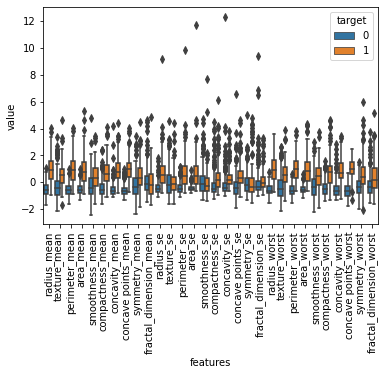

In [31]:
# Tekrardan box plot ile öznitelik değerlerinin nasıl dağıldığını görselleştirdim.
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

KNN MODELİNİN OLUŞTURULMASI

In [32]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)  #BAŞARI ORANINI TEST VERİ SETİ İLE ELDE ETTİK
acc = accuracy_score(Y_test, y_pred)
print("KNN modelinin başarı oranı: ",acc)
print("Confisuon matrix: \n",cm)

KNN modelinin başarı oranı:  0.9532163742690059
Confisuon matrix: 
 [[106   3]
 [  5  57]]


109 tane iyi huylu kanserin 106 tanesini doğru tahmin ettik, 62 tane kötü huylu kanserin 57 tanesini iyi huylu olarak tahmin ettik.
8 değeri yanlış tahmin ettik. Bu yüzden başarı oranım %95.3 olarak geldi. 

8 adet yanlış tahmin yüzde %4.7 oranında başarımı düşürdü.

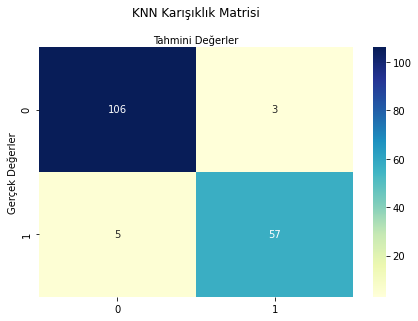

In [33]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGnBu',
           fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('KNN Karışıklık Matrisi', y = 1.1)
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmini Değerler')
plt.show()

KNN EN İYİ PARAMETRE BULMA

In [34]:
sayac = 1
for i in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = i)
    knn_yeni.fit(X_train, Y_train)
    print(sayac, " ", "Dogruluk orani %", knn_yeni.score(X_test,Y_test)*100)
    sayac += 1

1   Dogruluk orani % 95.32163742690058
2   Dogruluk orani % 95.32163742690058
3   Dogruluk orani % 95.32163742690058
4   Dogruluk orani % 95.90643274853801
5   Dogruluk orani % 95.90643274853801
6   Dogruluk orani % 97.07602339181285
7   Dogruluk orani % 96.49122807017544
8   Dogruluk orani % 95.90643274853801
9   Dogruluk orani % 95.90643274853801
10   Dogruluk orani % 95.32163742690058


En yüksek başarıyı 6 komşulukta aldım ve yeni bir KNN modeli eğittim.

In [35]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("KNN modelinin başarı oranı: ",acc)
print("Confisuon matrix: \n",cm_knn)

KNN modelinin başarı oranı:  0.9707602339181286
Confisuon matrix: 
 [[107   2]
 [  3  59]]


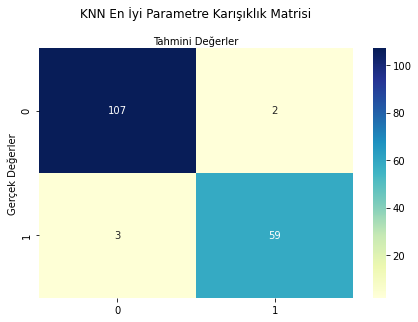

In [36]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_knn), annot = True, cmap = 'YlGnBu',
           fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('KNN En İyi Parametre Karışıklık Matrisi', y = 1.1)
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmini Değerler')
plt.show()

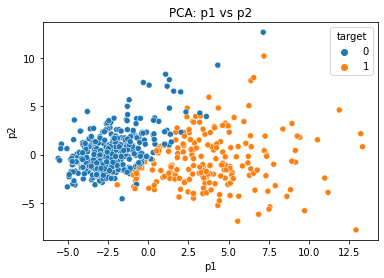

In [37]:
# PCA ile boyut indirgeme yaparak iki boyutlu bir veri elde ediyoruz sonra 
scaler = StandardScaler() #standardizasyon gerçekleştirdim çünkü denetimsiz bir algoritma old. için daha önceden yaptığım standadizasyonu algılamıyor
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2) #verimi 2 boyuta indirgiyorum
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")


X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.3, random_state = 42)


In [38]:
# Boyut indirgeme ile elde ettiğim veri için bir KNN modeli daha eğittim. Önce en iyi parametreyi buldum.
sayac = 1
for i in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = i)
    knn_yeni.fit(X_train_pca, Y_train_pca)
    print(sayac, " ", "Dogruluk orani %", knn_yeni.score(X_test_pca,Y_test_pca)*100)
    sayac += 1

1   Dogruluk orani % 92.98245614035088
2   Dogruluk orani % 92.39766081871345
3   Dogruluk orani % 94.15204678362574
4   Dogruluk orani % 92.39766081871345
5   Dogruluk orani % 94.73684210526315
6   Dogruluk orani % 93.56725146198829
7   Dogruluk orani % 94.15204678362574
8   Dogruluk orani % 92.39766081871345
9   Dogruluk orani % 92.39766081871345
10   Dogruluk orani % 92.39766081871345


In [39]:
# En iyi başarı oranını 5 komşulukta elde ettim ve bir model eğittim confisuon matrisini yazdırdım.
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_pca, Y_train_pca)
y_pred_pca = knn.predict(X_test_pca)
cm_pca = confusion_matrix(Y_test_pca, y_pred_pca)
acc = accuracy_score(Y_test_pca, y_pred_pca)
print("KNN modelinin başarı oranı: ",acc)
print("Confisuon matrix: \n",cm_pca)

KNN modelinin başarı oranı:  0.9473684210526315
Confisuon matrix: 
 [[103   6]
 [  3  59]]


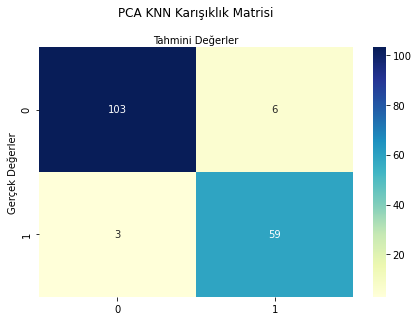

In [40]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_pca), annot = True, cmap = 'YlGnBu',
           fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('PCA KNN Karışıklık Matrisi', y = 1.1)
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmini Değerler')
plt.show()

In [41]:
Y_test_pca

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [42]:
y_pred_pca

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)